# BIKE SHARING

 **Context**  
Bike Sharing merupakan sebuah sistem pelayanan dimana pengguna layanannya dapat meminjam sepeda yang tersedia dalam waktu yang 
telah ditentukan. Bike sharing semakin digemari dengan disediakannya jalan atau jalur khusus untuk sepeda, dengan menggunakan 
sepeda dalam menjalankan aktivitas sehari hari pun dapat mengurangi polusi serta kemacetan dibandingkan dengan menggunakan kendaraan bermotor. Selain itu bike sharing juga menyediakan opsi pada user apakah mau menjadi member atau tidak. 

Target :

0 : Berminat untuk menyewa

1 : Tidak berminat untuk menyewa

### Problem Statement
Permintaan untuk penyewaan sepeda harus meningkat, tetapi kenyataannya permintaan menyewa sepeda masih rendah. Penyewa yang
sudah pernah menggunakan layanan bike sharing setidaknya hanya kembali menyewa 2 kali.

### Goals
Berdasarkan masalah tersebut, perusahaan ingin meningkatkan demannd untuk bike sharing.

### Analytic Approach
Maka berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seseorang memiliki
keinginan untuk meminjam atau menyewa sepeda pada pelayanan bike sharing.
Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang 
berminat untuk menggunakan layanan bike sharing atau tidak.

# DATA UNDERSTANDING

# Attribute Information
| Attribute | Data Type | Description |
| --- | --- | --- |
| dteday| Object | Tanggal + Stempel Waktu |
| hum | Float | Kelembaban relativ |
| weathersit | int | Cuaca 1. Cerah, 2. Kabut, 3. Salju, 4. Hujan |
| holiday | Int | Hari yang dianggap hari libur |
| season | Int | Musim 1. Jan-Mar, 2. Apr-Jun, 3. Jul-Sept, 4. Okt-Des |
| atemp | Float | Perkiraan suhu |
| temp | Float | Suhu |
| hr | Int | Berapa jam peminjaman |
| casual | Int | Jumlah penyewa yang tidak terdafatar |
| registered | Int | Jumlah penyewa yang terdaftar |
| cnt | Int | jumlah total yang terental |

In [8]:
#Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [23]:
# Load dataset
bike = df = pd.read_csv('data_bike_sharing.csv')
df

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


In [66]:
# Count and Datatype for each Column
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (12165, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


# DATA CLEANING


In [11]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,dteday,object,0,0.0,731,"[2012-02-07, 2011-11-12]"
1,hum,float64,0,0.0,89,"[0.61, 0.63]"
2,weathersit,int64,0,0.0,4,"[3, 4]"
3,holiday,int64,0,0.0,2,"[1, 0]"
4,season,int64,0,0.0,4,"[2, 3]"
5,atemp,float64,0,0.0,65,"[0.0909, 0.9091]"
6,temp,float64,0,0.0,50,"[0.66, 0.82]"
7,hr,int64,0,0.0,24,"[8, 14]"
8,casual,int64,0,0.0,305,"[297, 99]"
9,registered,int64,0,0.0,742,"[342, 595]"


In [56]:
display(df.describe(), df.describe(include='object'))

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000


,dteday
count,12165
unique,731
top,2011-08-09
freq,22


### Visualisasi 
reference :

https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

https://github.com/ResidentMario/missingno

In [24]:
df.isna().sum()/df.shape[0]*100

dteday        0.0
hum           0.0
weathersit    0.0
holiday       0.0
season        0.0
atemp         0.0
temp          0.0
hr            0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

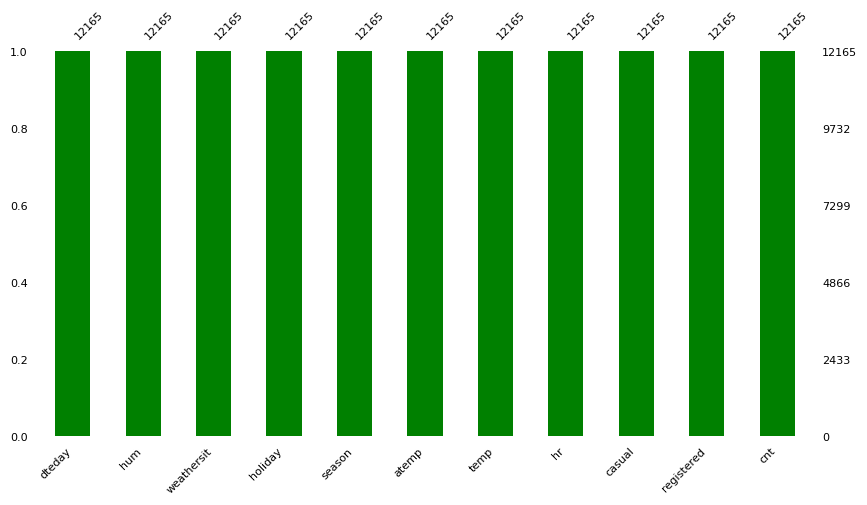

In [76]:
missingno.bar(df,color="green", sort="ascending", figsize=(10,5), fontsize=8);


# Data Analysis

<AxesSubplot: xlabel='cnt', ylabel='registered'>

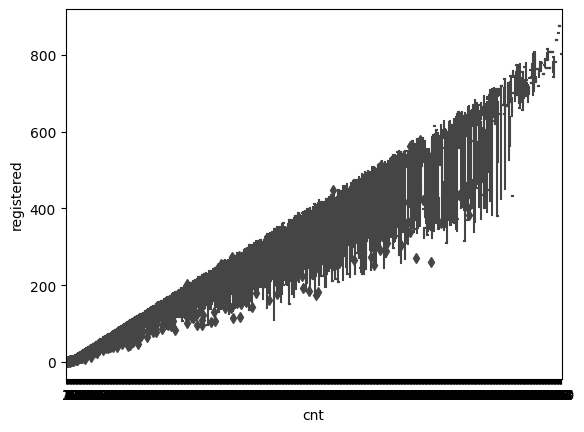

In [33]:
plt.subplot
sns.boxplot(data=df,y='registered', x='cnt')

<AxesSubplot: xlabel='cnt', ylabel='casual'>

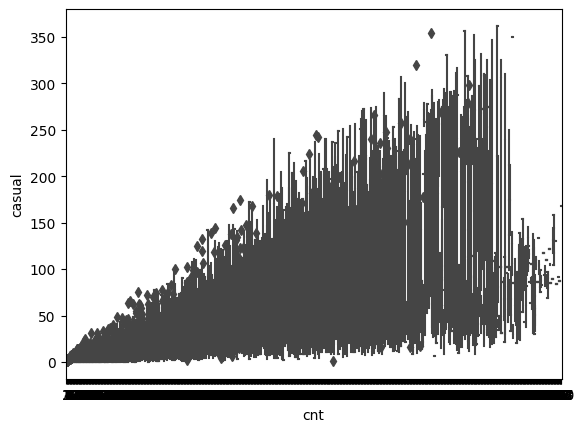

In [95]:
plt.subplot
sns.boxplot(data=df,y='casual', x='cnt')

NameError: name 'test_origin' is not defined

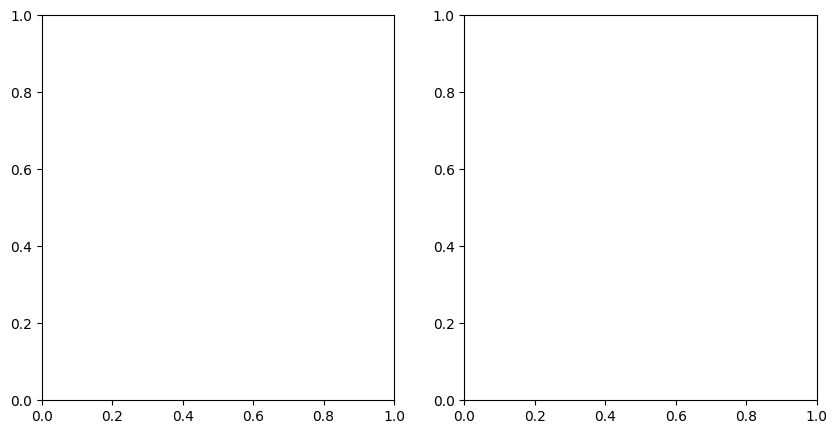

In [25]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
ax[0].hist(test_origin.temp,bins = 20)
ax[1].hist(train_origin.temp,bins = 20)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df['cnt'].value_counts()

5      189
6      178
4      171
3      150
2      145
      ... 
899      1
619      1
670      1
733      1
943      1
Name: cnt, Length: 830, dtype: int64

In [31]:
df_ct=pd.crosstab(df['season'],df['cnt'])
df_ct['Total']=df_ct.sum(axis=1)
df_ct.sort_values('Total',ascending=False).head(10)

cnt,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,676,677,678,679,680,681,682,683,684,686,687,688,689,690,691,692,693,694,696,698,699,701,702,703,704,705,706,707,708,710,711,712,713,714,715,719,721,722,723,724,727,729,730,731,732,733,734,736,737,738,740,741,743,744,745,747,748,749,750,751,752,754,755,757,759,760,761,766,767,769,770,772,776,777,779,781,782,783,784,785,788,790,792,793,794,795,796,797,798,800,801,805,806,808,810,811,812,813,814,815,817,818,820,822,823,824,825,826,827,831,833,834,835,837,838,839,843,844,846,850,851,852,853,856,857,858,863,864,865,867,868,869,872,873,877,878,884,886,887,888,891,892,893,894,898,899,900,901,905,913,917,922,941,943,948,953,963,967,968,970,Total
season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [34]:
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


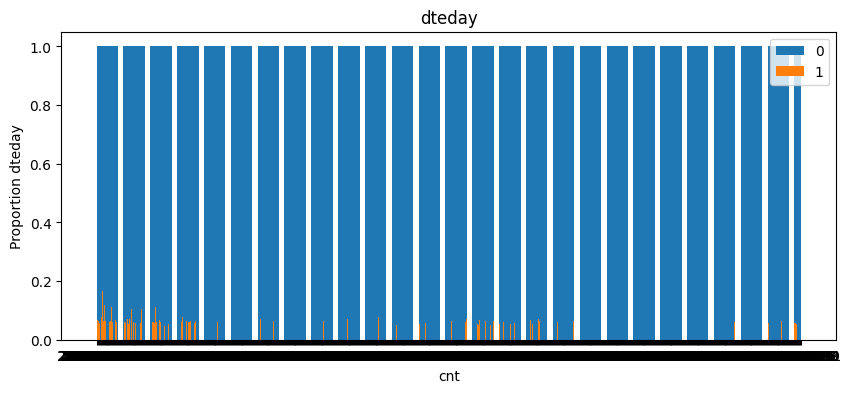

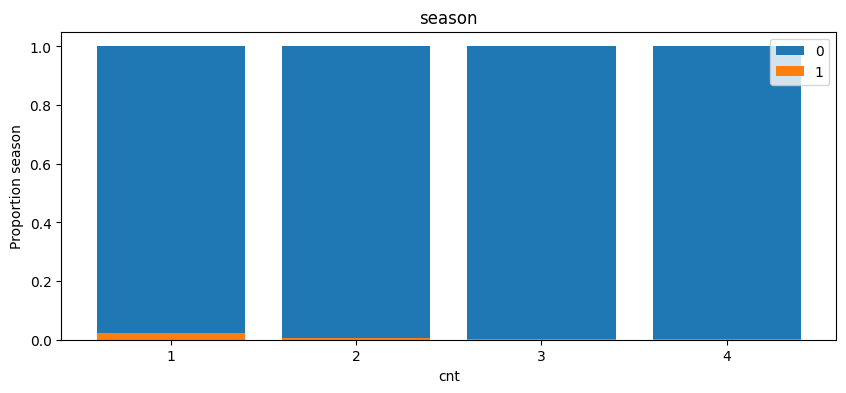

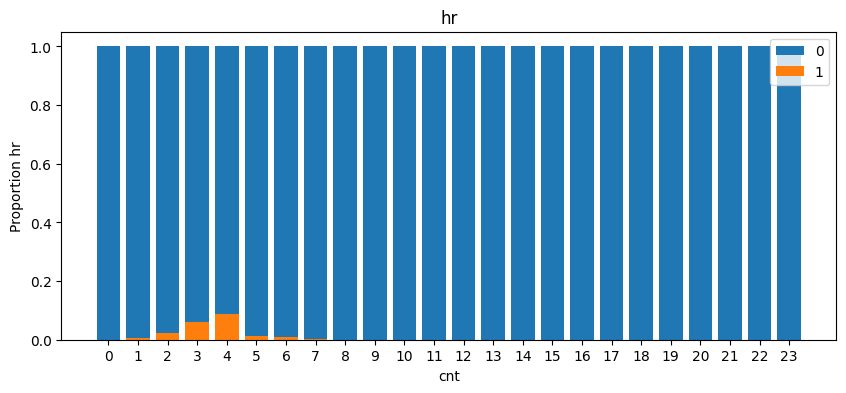

In [35]:
for i in ['dteday', 'season','hr']:
    ct=pd.crosstab(df[i],df['cnt'],normalize='index')
    ct['total']=ct.sum(axis=1)
    plt.figure(figsize=(10,4))
    plt.bar(np.arange(df[i].nunique()),ct['total'])
    plt.bar(np.arange(df[i].nunique()),ct[1])
    plt.xlabel('cnt')
    plt.ylabel(f'Proportion {i}')
    plt.legend([0,1])
    plt.xticks(np.arange(len(ct.index.tolist())),ct.index.tolist())
    plt.title(i)
    plt.show()

# Conclusion & Recommendation

Jumlah penyewa yang terdaftar sebagai member lebih banyak dibandingkan dengan peminjam/penyewa yang tidak mendaftar sebagai anggota. Artinya banyak orang tertarik untuk melanjutkan menggunakan pelayanan bike sharing lebih dari 1 kali setelah hari 
pertama peminjaman sepeda sehingga memutuskan untuk menjadi anggota.

Rekomendasi :
*Perbanyak promosi 
*Melakukan sosialiasi bahwa bersepeda memiliki banyak manfaat bagi lingkungan maupun kesehatan
*Selalu melakukan pengecekan terhadap sepeda yang tersedia untuk disewakan maupun yang telah kembali sehabis disewakan